# Iterative Policy Evaluation
Implementation of iterative policy evaluation with OpenAI Gym environment

Parameters for Policy Evaluation algorithm as **input**:

- `env`: This is an instance of an OpenAI Gym environment, where `env.P` returns the one-step dynamics.
- `policy`: This is a 2D numpy array with `policy.shape[0]` equal to the number of states (`env.nS`), and `policy.shape[1]` equal to the number of actions (`env.nA`).  `policy[s][a]` returns the probability that the agent takes action `a` while in state `s` under the policy.
- `gamma`: This is the discount rate.  It must be a value between 0 and 1, inclusive (default value: `1`).
- `theta`: This is a very small positive number that is used to decide if the estimate has sufficiently converged to the true value function (default value: `1e-8`).

The algorithm returns as **output**:
- `V`: This is a 1D numpy array with `V.shape[0]` equal to the number of states (`env.nS`).  `V[s]` contains the estimated value of state `s` under the input policy.

In [1]:
# Importing the necessary packages 
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.toy_text import frozen_lake

In [2]:
# Creation the OpenAI Gym 'frozen_lake' environment
frozen_lake_env = frozen_lake.FrozenLakeEnv()

In [3]:
print('Instance:', frozen_lake_env)

Instance: <FrozenLakeEnv instance>


In [4]:
print('Observation Space:',frozen_lake_env.observation_space.n)

Observation Space: 16


In [5]:
print('Action Space:',frozen_lake_env.action_space.n)

Action Space: 4


### Let's implement the iterative policy algorithm

<img src='./image/policy_evaluation.jpg' width='600'>

In [6]:
class Iterative_Policy(object):
    def __init__(self):
        super(Iterative_Policy, self).__init__()
        pass
    
    def policy(self, env):
        return np.ones([env.nS, env.nA]) / env.nA
    
    def policy_evaluation(self, env, policy, gamma=1, theta=1e-8):
        V = np.zeros(env.nS)
        while True:
            delta = 0
            for s in range(env.nS):
                Vs = 0
                for a, action_prob in enumerate(policy[s]):
                    for prob, next_state, reward, done in env.P[s][a]:
                        Vs += action_prob * prob * (reward + gamma * V[next_state])
                delta = max(delta, np.abs(V[s]-Vs))
                V[s] = Vs
            if delta < theta:
                break
        return V
    
    def visualize_values(self, V):
        V_sq = np.reshape(V, (4,4))

        fig = plt.figure(figsize=(6, 6))
        ax = fig.add_subplot(111)
        im = ax.imshow(V_sq, cmap='cool')
        for (j,i),label in np.ndenumerate(V_sq):
            ax.text(i, j, np.round(label, 5), ha='center', va='center', fontsize=14)
        plt.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False)
        plt.title('State Value Function')
        plt.show()

In [7]:
evl = Iterative_Policy()
policy = evl.policy(frozen_lake_env)
values = evl.policy_evaluation(frozen_lake_env, policy)

In [8]:
print(values)

[0.01393977 0.01163091 0.02095297 0.01047648 0.01624865 0.
 0.04075153 0.         0.03480619 0.08816993 0.14205316 0.
 0.         0.17582037 0.43929118 0.        ]


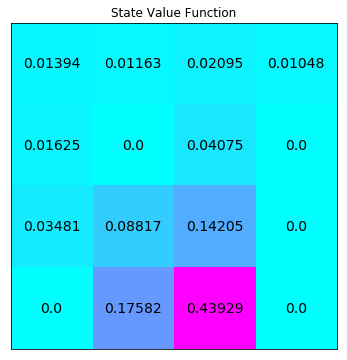

In [9]:
evl.visualize_values(values)